In [5]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

In [9]:
df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')

df_train.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,39205.170000,0
1,3,2,34,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,49278.030000,0
2,4,2,23,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,67333.770000,0
3,8,2,37,0,195,195,0,0,0,0,...,0,0,0,0,0,0,0,0,64007.970000,0
4,10,2,39,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,117310.979016,0


### Var 3
116 values in column *var3* are -999999. Probably *var3* is suspected to be the nationality of the customer, and -999999 would mean that the nationality of the customer is unknown

In [11]:
df_train.loc[df_train.var3==-999999].shape

# Replace -999999 in var3 column with most common value 2 
# See https://www.kaggle.com/cast42/santander-customer-satisfaction/debugging-var3-999999
# for details
train = train.replace(-999999,2)
train.loc[train.var3==-999999].shape

(116, 371)

### Var 38

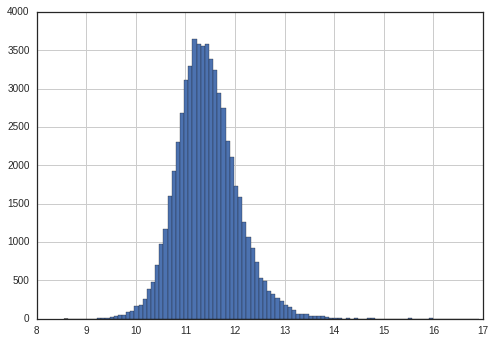

In [25]:
df_train.loc[~np.isclose(df_train.var38, 117310.979016), 'var38'].map(np.log).hist(bins=100)

In [30]:
# Above plot suggest we split up var38 into two variables
# var38mc == 1 when var38 has the most common value and 0 otherwise
# logvar38 is log transformed feature when var38mc is 0, zero otherwise
df_train['var38mc'] = np.isclose(df_train.var38, 117310.979016)
df_train['logvar38'] = df_train.loc[~df_train['var38mc'], 'var38'].map(np.log)
df_train.loc[df_train['var38mc'], 'logvar38'] = 0

### var15 (probably *age*)

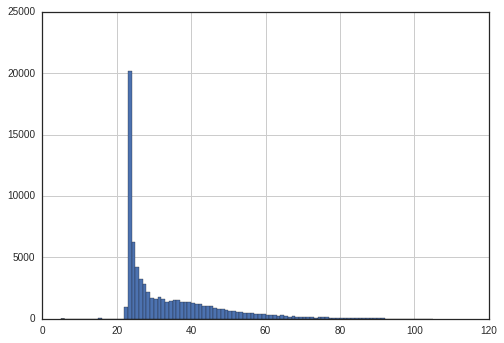

In [31]:
df_train['var15'].describe()

#Looks more normal, plot the histogram
df_train['var15'].hist(bins=100)

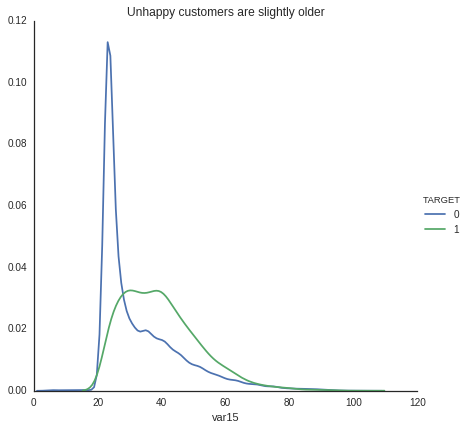

In [42]:
# Let's look at the density of the age of happy/unhappy customers
sns.FacetGrid(df_train, hue="TARGET", size=6).map(sns.kdeplot, "var15").add_legend()
plt.title('Unhappy customers are slightly older')
plt.show()

In [44]:
X = df_train.iloc[:,:-1]
y = df_train.TARGET

from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import f_classif,chi2
from sklearn.preprocessing import Binarizer, scale

# First select features based on chi2 and f_classif
p = 10 # percentage of selected features

X_bin = Binarizer().fit_transform(scale(X))
selectChi2 = SelectPercentile(chi2, percentile=p).fit(X_bin, y)
selectF_classif = SelectPercentile(f_classif, percentile=p).fit(X, y)

chi2_selected = selectChi2.get_support()
chi2_selected_features = [ f for i,f in enumerate(X.columns) if chi2_selected[i]]
#print('Chi2 selected {} features {}.'.format(chi2_selected.sum(),chi2_selected_features))
f_classif_selected = selectF_classif.get_support()
f_classif_selected_features = [ f for i,f in enumerate(X.columns) if f_classif_selected[i]]
# print('F_classif selected {} features {}.'.format(f_classif_selected.sum(),f_classif_selected_features))

In [45]:
selected = chi2_selected | f_classif_selected
print('Chi2 & F_classif selected {} features'.format(selected.sum()))
features = [ f for f,s in zip(X.columns, selected) if s]
print (features)

Chi2 & F_classif selected 50 features
['var15', 'imp_op_var39_efect_ult1', 'ind_var5_0', 'ind_var5', 'ind_var8_0', 'ind_var12_0', 'ind_var12', 'ind_var13_0', 'ind_var13_corto_0', 'ind_var13_corto', 'ind_var13', 'ind_var24_0', 'ind_var24', 'ind_var30', 'ind_var39_0', 'ind_var41_0', 'num_var4', 'num_var5', 'num_var8_0', 'num_var12_0', 'num_var12', 'num_var13_0', 'num_var13_corto_0', 'num_var13_corto', 'num_var13', 'num_var24_0', 'num_var24', 'num_var30_0', 'num_var30', 'num_var35', 'num_var41_0', 'num_var42', 'saldo_var5', 'saldo_var12', 'saldo_var13_corto', 'saldo_var13', 'saldo_var30', 'saldo_var42', 'var36', 'num_meses_var5_ult3', 'num_meses_var12_ult3', 'num_meses_var13_corto_ult3', 'saldo_medio_var5_hace2', 'saldo_medio_var5_hace3', 'saldo_medio_var5_ult1', 'saldo_medio_var5_ult3', 'saldo_medio_var12_ult3', 'saldo_medio_var13_corto_ult1', 'saldo_medio_var13_corto_ult3', 'TARGET']


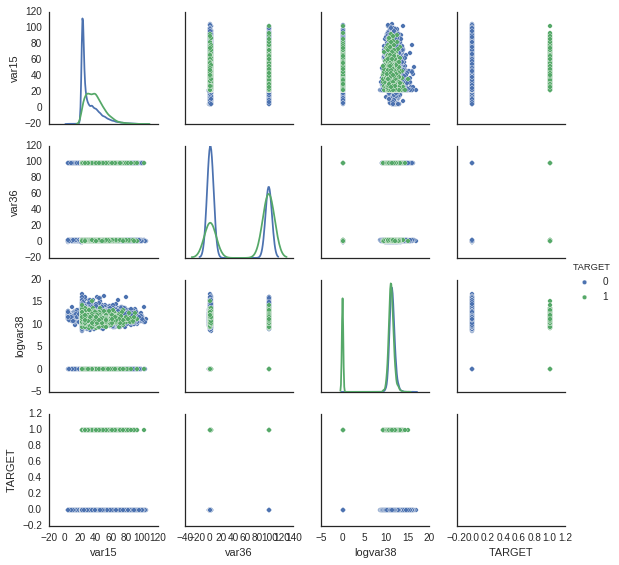

In [40]:
sns.pairplot(df_train[['var15','var36','logvar38','TARGET']], hue="TARGET", size=2, diag_kind="kde")

In [57]:
# Make a dataframe with the selected features and the target variable
X_tr = df_train[features].as_matrix()
t_tr = df_train['TARGET'].as_matrix()

np.shape(X_tr)
np.shape(t_tr)
np.count_nonzero(~np.isnan(X_tr))/np.size(X_tr)

1